In [74]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [75]:
recent_covid_data = pd.read_csv("covid-19-data-master/us-counties-recent.csv")

In [76]:
only_april_1st = recent_covid_data["date"] == "2021-04-01"
date_filtered = recent_covid_data[only_april_1st]

In [77]:
#population - done
#population density - done
#average persons per household - done

raw_population_data = pd.read_csv("Average_Household_Size_and_Population_Density_-_County.csv")

In [78]:
raw2_population_data = raw_population_data[["GEOID", "NAME", "State", "B01001_001E", "B01001_calc_PopDensity", "B25010_001E"]]
raw2_population_data = raw2_population_data.rename(columns = {"B01001_001E": "Total Population", "B01001_calc_PopDensity": "Population Density", "B25010_001E": "Average Household Size"})

In [79]:
date_filtered = date_filtered.dropna(subset=['fips'])
date_filtered["fips"] = date_filtered["fips"].astype(int)
raw2_population_data = raw2_population_data.rename(columns = {"GEOID": "fips"})
date_and_pop = date_filtered.merge(raw2_population_data, how='inner', on='fips')
date_and_pop = date_and_pop.drop(columns = ["NAME", "State"])

In [80]:
date_and_pop

,date,county,state,fips,cases,deaths,Total Population,Population Density,Average Household Size
0,2021-04-01,Autauga,Alabama,1001,6595,99.0,55200,35.853419,2.59
1,2021-04-01,Baldwin,Alabama,1003,20523,301.0,208107,50.541504,2.61
2,2021-04-01,Barbour,Alabama,1005,2227,55.0,25782,11.247981,2.49
3,2021-04-01,Bibb,Alabama,1007,2543,58.0,22527,13.973114,2.99
4,2021-04-01,Blount,Alabama,1009,6446,131.0,57645,34.515816,2.77
...,...,...,...,...,...,...,...,...,...
3206,2021-04-01,Sweetwater,Wyoming,56037,4030,37.0,44117,1.633615,2.74
3207,2021-04-01,Teton,Wyoming,56039,3618,9.0,23059,2.227539,2.42
3208,2021-04-01,Uinta,Wyoming,56041,2134,12.0,20609,3.822405,2.63
3209,2021-04-01,Washakie,Wyoming,56043,890,26.0,8129,1.402002,2.33


In [81]:
#median family income
#adults finished highschool
#percent aged 65 and older

#High school graduation raw value
#Life expectancy raw value
#Median household income raw value
#% 65 and older raw value

In [82]:
big_data = pd.read_csv("analytic_data2021.csv")

C:\Users\charl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [83]:
big_data = big_data[["5-digit FIPS Code", "Name", "% 65 and older raw value", "High school graduation raw value", "Life expectancy raw value", "Median household income raw value"]]

In [84]:
big_data = big_data.dropna(subset=["5-digit FIPS Code", "% 65 and older raw value", "High school graduation raw value", "Life expectancy raw value", "Median household income raw value"])

In [85]:
big_data

,5-digit FIPS Code,Name,% 65 and older raw value,High school graduation raw value,Life expectancy raw value,Median household income raw value
0,fipscode,county,v053_rawvalue,v021_rawvalue,v147_rawvalue,v063_rawvalue
1,00000,United States,0.164691511,0.85,79.173087876,65712
2,01000,Alabama,0.1733234622,0.9017991514,75.548075469,51771
3,01001,Autauga County,0.1597307988,0.89,77.162581316,58233
4,01003,Baldwin County,0.2097798722,0.88,78.213404894,59871
...,...,...,...,...,...,...
3189,56035,Sublette County,0.205167,0.964916,83.0612,78055
3190,56037,Sweetwater County,0.129632,0.8027,77.5338,80639
3191,56039,Teton County,0.158413,0.875,87.4714,98837
3192,56041,Uinta County,0.14956,0.845938,78.2444,70756


In [86]:
big_data = big_data.iloc[1:]
big_data["5-digit FIPS Code"] = big_data["5-digit FIPS Code"].astype(int)

<ipython-input-86-d5aad12af762>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_data["5-digit FIPS Code"] = big_data["5-digit FIPS Code"].astype(int)


In [87]:
big_data

,5-digit FIPS Code,Name,% 65 and older raw value,High school graduation raw value,Life expectancy raw value,Median household income raw value
1,0,United States,0.164691511,0.85,79.173087876,65712
2,1000,Alabama,0.1733234622,0.9017991514,75.548075469,51771
3,1001,Autauga County,0.1597307988,0.89,77.162581316,58233
4,1003,Baldwin County,0.2097798722,0.88,78.213404894,59871
5,1005,Barbour County,0.1969132302,0.8206896552,74.05474119,35972
...,...,...,...,...,...,...
3189,56035,Sublette County,0.205167,0.964916,83.0612,78055
3190,56037,Sweetwater County,0.129632,0.8027,77.5338,80639
3191,56039,Teton County,0.158413,0.875,87.4714,98837
3192,56041,Uinta County,0.14956,0.845938,78.2444,70756


In [88]:
big_data = big_data.rename(columns = {"5-digit FIPS Code": "fips"})

In [89]:
merged_final = date_and_pop.merge(big_data, how = "inner", on = "fips")

In [90]:
merged_final = merged_final.drop(columns = "Name")

In [91]:
merged_final

,date,county,state,fips,cases,deaths,Total Population,Population Density,Average Household Size,% 65 and older raw value,High school graduation raw value,Life expectancy raw value,Median household income raw value
0,2021-04-01,Autauga,Alabama,1001,6595,99.0,55200,35.853419,2.59,0.1597307988,0.89,77.162581316,58233
1,2021-04-01,Baldwin,Alabama,1003,20523,301.0,208107,50.541504,2.61,0.2097798722,0.88,78.213404894,59871
2,2021-04-01,Barbour,Alabama,1005,2227,55.0,25782,11.247981,2.49,0.1969132302,0.8206896552,74.05474119,35972
3,2021-04-01,Bibb,Alabama,1007,2543,58.0,22527,13.973114,2.99,0.1666964365,0.88,73.408783662,47918
4,2021-04-01,Blount,Alabama,1009,6446,131.0,57645,34.515816,2.77,0.1870093038,0.9292558747,74.370873779,52902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,2021-04-01,Sublette,Wyoming,56035,707,7.0,9951,0.786272,3.01,0.205167,0.964916,83.0612,78055
2577,2021-04-01,Sweetwater,Wyoming,56037,4030,37.0,44117,1.633615,2.74,0.129632,0.8027,77.5338,80639
2578,2021-04-01,Teton,Wyoming,56039,3618,9.0,23059,2.227539,2.42,0.158413,0.875,87.4714,98837
2579,2021-04-01,Uinta,Wyoming,56041,2134,12.0,20609,3.822405,2.63,0.14956,0.845938,78.2444,70756


In [92]:
merged_final = merged_final.rename(columns = {"cases": "Cases", "deaths": "Deaths", "% 65 and older raw value": "65 and Older", "High school graduation raw value": "High School Graduation", "Life expectancy raw value": "Life Expectancy", "Median household income raw value": "Median Household Income"})

In [93]:
merged_final = merged_final.drop(columns = ["date"])

In [94]:
merged_final

,county,state,fips,Cases,Deaths,Total Population,Population Density,Average Household Size,65 and Older,High School Graduation,Life Expectancy,Median Household Income
0,Autauga,Alabama,1001,6595,99.0,55200,35.853419,2.59,0.1597307988,0.89,77.162581316,58233
1,Baldwin,Alabama,1003,20523,301.0,208107,50.541504,2.61,0.2097798722,0.88,78.213404894,59871
2,Barbour,Alabama,1005,2227,55.0,25782,11.247981,2.49,0.1969132302,0.8206896552,74.05474119,35972
3,Bibb,Alabama,1007,2543,58.0,22527,13.973114,2.99,0.1666964365,0.88,73.408783662,47918
4,Blount,Alabama,1009,6446,131.0,57645,34.515816,2.77,0.1870093038,0.9292558747,74.370873779,52902
...,...,...,...,...,...,...,...,...,...,...,...,...
2576,Sublette,Wyoming,56035,707,7.0,9951,0.786272,3.01,0.205167,0.964916,83.0612,78055
2577,Sweetwater,Wyoming,56037,4030,37.0,44117,1.633615,2.74,0.129632,0.8027,77.5338,80639
2578,Teton,Wyoming,56039,3618,9.0,23059,2.227539,2.42,0.158413,0.875,87.4714,98837
2579,Uinta,Wyoming,56041,2134,12.0,20609,3.822405,2.63,0.14956,0.845938,78.2444,70756


In [95]:
merged_final = merged_final.rename(columns = {"65 and Older": "Elder_Proportion"})

In [96]:
merged_final

,county,state,fips,Cases,Deaths,Total Population,Population Density,Average Household Size,Elder_Proportion,High School Graduation,Life Expectancy,Median Household Income
0,Autauga,Alabama,1001,6595,99.0,55200,35.853419,2.59,0.1597307988,0.89,77.162581316,58233
1,Baldwin,Alabama,1003,20523,301.0,208107,50.541504,2.61,0.2097798722,0.88,78.213404894,59871
2,Barbour,Alabama,1005,2227,55.0,25782,11.247981,2.49,0.1969132302,0.8206896552,74.05474119,35972
3,Bibb,Alabama,1007,2543,58.0,22527,13.973114,2.99,0.1666964365,0.88,73.408783662,47918
4,Blount,Alabama,1009,6446,131.0,57645,34.515816,2.77,0.1870093038,0.9292558747,74.370873779,52902
...,...,...,...,...,...,...,...,...,...,...,...,...
2576,Sublette,Wyoming,56035,707,7.0,9951,0.786272,3.01,0.205167,0.964916,83.0612,78055
2577,Sweetwater,Wyoming,56037,4030,37.0,44117,1.633615,2.74,0.129632,0.8027,77.5338,80639
2578,Teton,Wyoming,56039,3618,9.0,23059,2.227539,2.42,0.158413,0.875,87.4714,98837
2579,Uinta,Wyoming,56041,2134,12.0,20609,3.822405,2.63,0.14956,0.845938,78.2444,70756


In [97]:
merged_final = merged_final.rename(columns = {"Total Population": 'Total_Population', "Population Density": 'Population_Density', "Average Household Size": "Average_Household_Size", "High School Graduation": 'High_School_Graduation', "Life Expectancy": "Life_Expectancy", "Median Household Income": "Median_Household_Income"})

In [98]:
final_data = merged_final[['Cases', 'Deaths', 'Total_Population',
       'Population_Density', 'Average_Household_Size', 'Elder_Proportion',
       'High_School_Graduation', 'Life_Expectancy', 'Median_Household_Income']]

In [99]:
final_data

,Cases,Deaths,Total_Population,Population_Density,Average_Household_Size,Elder_Proportion,High_School_Graduation,Life_Expectancy,Median_Household_Income
0,6595,99.0,55200,35.853419,2.59,0.1597307988,0.89,77.162581316,58233
1,20523,301.0,208107,50.541504,2.61,0.2097798722,0.88,78.213404894,59871
2,2227,55.0,25782,11.247981,2.49,0.1969132302,0.8206896552,74.05474119,35972
3,2543,58.0,22527,13.973114,2.99,0.1666964365,0.88,73.408783662,47918
4,6446,131.0,57645,34.515816,2.77,0.1870093038,0.9292558747,74.370873779,52902
...,...,...,...,...,...,...,...,...,...
2576,707,7.0,9951,0.786272,3.01,0.205167,0.964916,83.0612,78055
2577,4030,37.0,44117,1.633615,2.74,0.129632,0.8027,77.5338,80639
2578,3618,9.0,23059,2.227539,2.42,0.158413,0.875,87.4714,98837
2579,2134,12.0,20609,3.822405,2.63,0.14956,0.845938,78.2444,70756


In [100]:
final_data.columns.values

array(['Cases', 'Deaths', 'Total_Population', 'Population_Density',
       'Average_Household_Size', 'Elder_Proportion',
       'High_School_Graduation', 'Life_Expectancy',
       'Median_Household_Income'], dtype=object)

In [101]:
#checking for strings
df_subset = final_data.select_dtypes(exclude=[np.object])
df_subset

,Cases,Deaths,Total_Population,Population_Density,Average_Household_Size
0,6595,99.0,55200,35.853419,2.59
1,20523,301.0,208107,50.541504,2.61
2,2227,55.0,25782,11.247981,2.49
3,2543,58.0,22527,13.973114,2.99
4,6446,131.0,57645,34.515816,2.77
...,...,...,...,...,...
2576,707,7.0,9951,0.786272,3.01
2577,4030,37.0,44117,1.633615,2.74
2578,3618,9.0,23059,2.227539,2.42
2579,2134,12.0,20609,3.822405,2.63


In [102]:
rows_with_strings  = final_data.apply(
       lambda row : 
          any([ isinstance(e, str) for e in row ])
       , axis=1) 

In [103]:
cleaned_data = final_data[~rows_with_strings]

In [104]:
cleaned_data

,Cases,Deaths,Total_Population,Population_Density,Average_Household_Size,Elder_Proportion,High_School_Graduation,Life_Expectancy,Median_Household_Income
851,542,7.0,8306,15.819943,2.45,0.171986,0.960149,73.9383,53289
852,977,8.0,13116,10.284214,2.40,0.177276,0.921528,69.6184,33407
853,1143,13.0,20080,13.606269,2.58,0.197636,0.926557,76.5138,46069
854,6803,70.0,79466,103.295593,2.69,0.16181,0.89,78.4575,66335
855,1412,24.0,12745,11.548862,2.51,0.188369,0.925,73.7147,46305
...,...,...,...,...,...,...,...,...,...
2576,707,7.0,9951,0.786272,3.01,0.205167,0.964916,83.0612,78055
2577,4030,37.0,44117,1.633615,2.74,0.129632,0.8027,77.5338,80639
2578,3618,9.0,23059,2.227539,2.42,0.158413,0.875,87.4714,98837
2579,2134,12.0,20609,3.822405,2.63,0.14956,0.845938,78.2444,70756


In [105]:
dataset_1 = cleaned_data.apply(pd.to_numeric)

In [106]:
dataset_1['Log_Population'] = np.log2(dataset_1['Total_Population'])
dataset_1["Log_Median_Income"] = np.log2(dataset_1["Median_Household_Income"])

In [107]:
expr = "Cases ~ Log_Population + Population_Density + Average_Household_Size + Elder_Proportion + High_School_Graduation + Life_Expectancy + Log_Median_Income"
y, X = dmatrices(expr, dataset_1, return_type='dataframe')
poisson_training_results = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Cases   No. Observations:                 1730
Model:                            GLM   Df Residuals:                     1722
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.7202e+05
Date:                Mon, 26 Apr 2021   Deviance:                   1.1266e+06
Time:                        01:18:00   Pearson chi2:                 1.09e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [108]:
#expr = "Cases ~ Total_Population + Population_Density + Average_Household_Size + Elder_Proportion + High_School_Graduation + Life_Expectancy + Median_Household_Income"
#y, X = dmatrices(expr, dataset_1, return_type='dataframe')
#poisson_training_results = sm.GLM(y, X, family=sm.families.Poisson()).fit()
#print(poisson_training_results.summary())

In [109]:
expr = "Deaths ~ Log_Population + Population_Density + Average_Household_Size + Elder_Proportion + High_School_Graduation + Life_Expectancy + Log_Median_Income"
y, X = dmatrices(expr, dataset_1, return_type='dataframe')
poisson_training_results1 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson_training_results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                 1730
Model:                            GLM   Df Residuals:                     1722
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27045.
Date:                Mon, 26 Apr 2021   Deviance:                       43676.
Time:                        01:18:00   Pearson chi2:                 4.39e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4

In [110]:
#gen_poisson_gp1 = sm.GeneralizedPoisson(y, X, p=1)
#gen_poisson_gp1_results = gen_poisson_gp1.fit()
#print(gen_poisson_gp1_results.summary())

#gen_poisson_gp2 = sm.GeneralizedPoisson(y, X, p=2)
#gen_poisson_gp2_results = gen_poisson_gp2.fit()
#print(gen_poisson_gp2_results.summary())

In [111]:
dataset_1.head()

,Cases,Deaths,Total_Population,Population_Density,Average_Household_Size,Elder_Proportion,High_School_Graduation,Life_Expectancy,Median_Household_Income,Log_Population,Log_Median_Income
851,542,7.0,8306,15.819943,2.45,0.171986,0.960149,73.938335,53289,13.019938,15.701550
852,977,8.0,13116,10.284214,2.40,0.177276,0.921528,69.618368,33407,13.679040,15.027863
853,1143,13.0,20080,13.606269,2.58,0.197636,0.926557,76.513786,46069,14.293472,15.491509
854,6803,70.0,79466,103.295593,2.69,0.161810,0.890000,78.457504,66335,16.278050,16.017483
855,1412,24.0,12745,11.548862,2.51,0.188369,0.925000,73.714741,46305,13.637644,15.498880


In [112]:
print(poisson_training_results.params)
print("----- NEXT PARAMS-----")
print(poisson_training_results1.params)

Intercept                -0.379552
Log_Population            0.681158
Population_Density        0.000046
Average_Household_Size    0.318730
Elder_Proportion         -1.130392
High_School_Graduation    0.498703
Life_Expectancy          -0.020606
Log_Median_Income        -0.080495
dtype: float64
----- NEXT PARAMS-----
Intercept                -4.407983
Log_Population            0.727248
Population_Density        0.000183
Average_Household_Size    0.890700
Elder_Proportion          5.507831
High_School_Graduation    1.074252
Life_Expectancy          -0.053044
Log_Median_Income        -0.169929
dtype: float64


In [113]:
cases_coefs = poisson_training_results.params
deaths_coefs = poisson_training_results1.params

In [114]:
dataset_1['Predicted Cases'] = cases_coefs[0] + cases_coefs[1]*dataset_1["Log_Population"] + cases_coefs[2]*dataset_1["Population_Density"] + cases_coefs[3]*dataset_1["Average_Household_Size"] + cases_coefs[4]*dataset_1["Elder_Proportion"] + cases_coefs[5]*dataset_1["High_School_Graduation"] + cases_coefs[6]*dataset_1["Life_Expectancy"] + cases_coefs*dataset_1["Log_Median_Income"]

In [115]:
cases_coefs[1]

0.681158278043877

In [116]:
dataset_1.head()

,Cases,Deaths,Total_Population,Population_Density,Average_Household_Size,Elder_Proportion,High_School_Graduation,Life_Expectancy,Median_Household_Income,Log_Population,Log_Median_Income,Predicted Cases
851,542,7.0,8306,15.819943,2.45,0.171986,0.960149,73.938335,53289,13.019938,15.701550,NaN
852,977,8.0,13116,10.284214,2.40,0.177276,0.921528,69.618368,33407,13.679040,15.027863,NaN
853,1143,13.0,20080,13.606269,2.58,0.197636,0.926557,76.513786,46069,14.293472,15.491509,NaN
854,6803,70.0,79466,103.295593,2.69,0.161810,0.890000,78.457504,66335,16.278050,16.017483,NaN
855,1412,24.0,12745,11.548862,2.51,0.188369,0.925000,73.714741,46305,13.637644,15.498880,NaN


In [117]:
cases_df = dataset_1[['Log_Population', 'Population_Density', 'Average_Household_Size', 'Elder_Proportion', 'High_School_Graduation', 'Life_Expectancy', 'Log_Median_Income']]

In [118]:
print(poisson_training_results.params)
print("----- NEXT PARAMS-----")
print(poisson_training_results1.params)

Intercept                -0.379552
Log_Population            0.681158
Population_Density        0.000046
Average_Household_Size    0.318730
Elder_Proportion         -1.130392
High_School_Graduation    0.498703
Life_Expectancy          -0.020606
Log_Median_Income        -0.080495
dtype: float64
----- NEXT PARAMS-----
Intercept                -4.407983
Log_Population            0.727248
Population_Density        0.000183
Average_Household_Size    0.890700
Elder_Proportion          5.507831
High_School_Graduation    1.074252
Life_Expectancy          -0.053044
Log_Median_Income        -0.169929
dtype: float64


In [119]:
for index, row in dataset_1.iterrows():
    dataset_1["Predicted Cases"] = (row['Total_Population'] + 1)

In [120]:
dataset_1

,Cases,Deaths,Total_Population,Population_Density,Average_Household_Size,Elder_Proportion,High_School_Graduation,Life_Expectancy,Median_Household_Income,Log_Population,Log_Median_Income,Predicted Cases
851,542,7.0,8306,15.819943,2.45,0.171986,0.960149,73.938335,53289,13.019938,15.701550,8130.0
852,977,8.0,13116,10.284214,2.40,0.177276,0.921528,69.618368,33407,13.679040,15.027863,8130.0
853,1143,13.0,20080,13.606269,2.58,0.197636,0.926557,76.513786,46069,14.293472,15.491509,8130.0
854,6803,70.0,79466,103.295593,2.69,0.161810,0.890000,78.457504,66335,16.278050,16.017483,8130.0
855,1412,24.0,12745,11.548862,2.51,0.188369,0.925000,73.714741,46305,13.637644,15.498880,8130.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2576,707,7.0,9951,0.786272,3.01,0.205167,0.964916,83.061239,78055,13.280626,16.252203,8130.0
2577,4030,37.0,44117,1.633615,2.74,0.129632,0.802700,77.533795,80639,15.429047,16.299190,8130.0
2578,3618,9.0,23059,2.227539,2.42,0.158413,0.875000,87.471434,98837,14.493042,16.592764,8130.0
2579,2134,12.0,20609,3.822405,2.63,0.149560,0.845938,78.244365,70756,14.330987,16.110565,8130.0


In [121]:
preds = []
for index, row in dataset_1.iterrows():
    preds.append(cases_coefs[0] + cases_coefs[1]*row["Log_Population"] + cases_coefs[2]*row["Population_Density"] + cases_coefs[3]*row["Average_Household_Size"] + cases_coefs[4]*row["Elder_Proportion"] + cases_coefs[5]*row["High_School_Graduation"] + cases_coefs[6]*row["Life_Expectancy"] + cases_coefs*row["Log_Median_Income"])

In [122]:
print(preds)

[Intercept                  2.071978
Log_Population            18.726774
Population_Density         8.032253
Average_Household_Size    13.036093
Elder_Proportion          -9.717372
High_School_Graduation    15.861939
Life_Expectancy            7.707985
Log_Median_Income          6.767638
dtype: float64, Intercept                  2.824217
Log_Population            18.764426
Population_Density         8.528762
Average_Household_Size    13.317908
Elder_Proportion          -8.459301
High_School_Graduation    16.022509
Life_Expectancy            8.218407
Log_Median_Income          7.318407
dtype: float64, Intercept                  2.961694
Log_Population            19.393697
Population_Density         8.842238
Average_Household_Size    13.779140
Elder_Proportion          -8.669949
High_School_Graduation    16.567185
Life_Expectancy            8.522307
Log_Median_Income          7.594540
dtype: float64, Intercept                  4.135257
Log_Population            21.125166
Population_Dens

In [123]:
preds = []
for index, row in dataset_1.iterrows():
    preds.append(np.exp(cases_coefs[0] + cases_coefs[1]*row["Log_Population"] + cases_coefs[2]*row["Population_Density"] + cases_coefs[3]*row["Average_Household_Size"] + cases_coefs[4]*row["Elder_Proportion"] + cases_coefs[5]*row["High_School_Graduation"] + cases_coefs[6]*row["Life_Expectancy"] + cases_coefs[7]*row["Log_Median_Income"]))

In [124]:
print(preds)

[869.2563715092114, 1507.7994979813627, 1987.3147559943607, 7520.58365183738, 1329.0175321772851, 1244.568638953253, 3707.311328590973, 8550.731036438008, 1223.072054762599, 3066.20413067037, 1611.7739521237531, 7742.299323632499, 3588.295640139757, 2310.948623044205, 1130.1229446142854, 907.8168027361802, 673.2830054520217, 9178.795176223557, 1132.8150525735812, 737.1984617114492, 1626.5841210387014, 27811.497122730798, 1499.0002515201757, 4047.6266137125253, 4464.689166393511, 1077.7533829382514, 1656.1250192699836, 2864.96890378624, 3680.068115516116, 2878.4385184794282, 1088.7890723671849, 3534.68558538516, 902.0063007641511, 10503.79807739206, 3032.2616967952135, 1962.757198168736, 1996.3934659349097, 4223.226009468065, 1641.9890990184663, 4324.564243600741, 1411.2290426373158, 67554.96582389338, 5304.714421868247, 2658.642831090613, 16105.370889299531, 1665.5771635268932, 3458.0303723681145, 1430.7746064030453, 6169.465781975785, 1864.4827927064068, 1217.8025330762578, 2403.77032

In [125]:
len(preds)

1730

In [126]:
dataset_1["Predicted Cases"] = preds

In [127]:
dataset_1.head()

,Cases,Deaths,Total_Population,Population_Density,Average_Household_Size,Elder_Proportion,High_School_Graduation,Life_Expectancy,Median_Household_Income,Log_Population,Log_Median_Income,Predicted Cases
851,542,7.0,8306,15.819943,2.45,0.171986,0.960149,73.938335,53289,13.019938,15.701550,869.256372
852,977,8.0,13116,10.284214,2.40,0.177276,0.921528,69.618368,33407,13.679040,15.027863,1507.799498
853,1143,13.0,20080,13.606269,2.58,0.197636,0.926557,76.513786,46069,14.293472,15.491509,1987.314756
854,6803,70.0,79466,103.295593,2.69,0.161810,0.890000,78.457504,66335,16.278050,16.017483,7520.583652
855,1412,24.0,12745,11.548862,2.51,0.188369,0.925000,73.714741,46305,13.637644,15.498880,1329.017532


In [128]:
Predicted_Total = dataset_1['Predicted Cases'].sum()
Actual_Total = dataset_1["Cases"].sum()

In [129]:
print(Predicted_Total)
print(Actual_Total)

16569802.999999715
16569803


In [130]:
check = np.e

In [131]:
print(check)

2.718281828459045


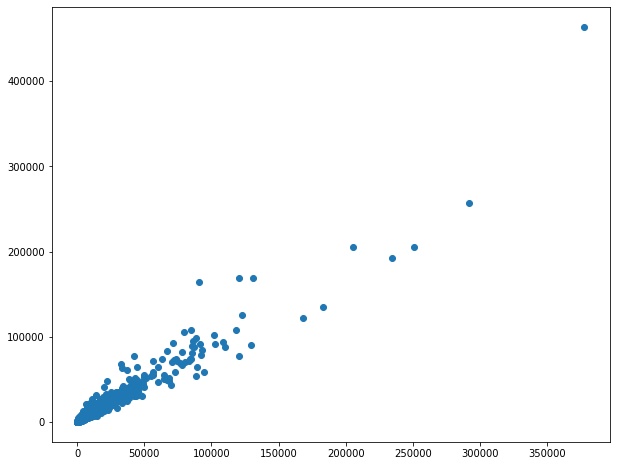

In [132]:
plt.figure(figsize = (10,8))
plt.scatter(dataset_1["Cases"], dataset_1["Predicted Cases"])

In [133]:
dataset_1["Cases"].corr(dataset_1["Predicted Cases"])

0.9689305729774967

In [134]:
preds1 = []
for index, row in dataset_1.iterrows():
    preds1.append(np.exp(deaths_coefs[0] + deaths_coefs[1]*row["Log_Population"] + deaths_coefs[2]*row["Population_Density"] + deaths_coefs[3]*row["Average_Household_Size"] + deaths_coefs[4]*row["Elder_Proportion"] + deaths_coefs[5]*row["High_School_Graduation"] + deaths_coefs[6]*row["Life_Expectancy"] + deaths_coefs[7]*row["Log_Median_Income"]))

In [135]:
dataset_1["Predicted Deaths"] = preds1

In [136]:
dataset_1

,Cases,Deaths,Total_Population,Population_Density,Average_Household_Size,Elder_Proportion,High_School_Graduation,Life_Expectancy,Median_Household_Income,Log_Population,Log_Median_Income,Predicted Cases,Predicted Deaths
851,542,7.0,8306,15.819943,2.45,0.171986,0.960149,73.938335,53289,13.019938,15.701550,869.256372,13.935349
852,977,8.0,13116,10.284214,2.40,0.177276,0.921528,69.618368,33407,13.679040,15.027863,1507.799498,29.948759
853,1143,13.0,20080,13.606269,2.58,0.197636,0.926557,76.513786,46069,14.293472,15.491509,1987.314756,39.656763
854,6803,70.0,79466,103.295593,2.69,0.161810,0.890000,78.457504,66335,16.278050,16.017483,7520.583652,122.592001
855,1412,24.0,12745,11.548862,2.51,0.188369,0.925000,73.714741,46305,13.637644,15.498880,1329.017532,25.408611
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,707,7.0,9951,0.786272,3.01,0.205167,0.964916,83.061239,78055,13.280626,16.252203,949.147637,18.735952
2577,4030,37.0,44117,1.633615,2.74,0.129632,0.802700,77.533795,80639,15.429047,16.299190,4219.894161,51.803662
2578,3618,9.0,23059,2.227539,2.42,0.158413,0.875000,87.471434,98837,14.493042,16.592764,1608.642776,14.027348
2579,2134,12.0,20609,3.822405,2.63,0.149560,0.845938,78.244365,70756,14.330987,16.110565,1927.983370,24.579011


In [137]:
Predicted_Total1 = dataset_1['Predicted Deaths'].sum()
Actual_Total1 = dataset_1["Deaths"].sum()

In [138]:
print(Predicted_Total1)
print(Actual_Total1)

299921.0000000277
299921.0


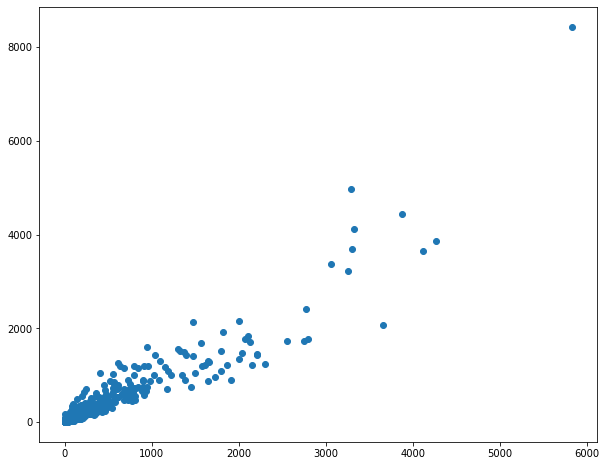

In [139]:
plt.figure(figsize = (10,8))
plt.scatter(dataset_1["Deaths"], dataset_1["Predicted Deaths"])

In [140]:
dataset_1["Deaths"].corr(dataset_1["Predicted Deaths"])

0.942399756891015

In [141]:
print(dataset_1["Cases"].mean())
print(dataset_1["Cases"].var())
print(dataset_1["Deaths"].mean())
print(dataset_1["Deaths"].var())

9577.920809248555
499147402.31356305
173.36473988439306
172244.59505444337


In [142]:
dataset_1.head()

,Cases,Deaths,Total_Population,Population_Density,Average_Household_Size,Elder_Proportion,High_School_Graduation,Life_Expectancy,Median_Household_Income,Log_Population,Log_Median_Income,Predicted Cases,Predicted Deaths
851,542,7.0,8306,15.819943,2.45,0.171986,0.960149,73.938335,53289,13.019938,15.701550,869.256372,13.935349
852,977,8.0,13116,10.284214,2.40,0.177276,0.921528,69.618368,33407,13.679040,15.027863,1507.799498,29.948759
853,1143,13.0,20080,13.606269,2.58,0.197636,0.926557,76.513786,46069,14.293472,15.491509,1987.314756,39.656763
854,6803,70.0,79466,103.295593,2.69,0.161810,0.890000,78.457504,66335,16.278050,16.017483,7520.583652,122.592001
855,1412,24.0,12745,11.548862,2.51,0.188369,0.925000,73.714741,46305,13.637644,15.498880,1329.017532,25.408611


In [143]:
dataset_1.to_csv("C:/Users/charl/Documents/STA378 Bicycle Code/Case Study 1 Data.csv")